## <b> Problem Statement </b>
Consider there’s a client that specializes in trading used cars across different states in the US. As a Data Scientist, you are given the task of creating an automated system that predicts the selling price of cars based on various features (information) such as the car’s model name, manufacture year, the current price when bought new, kilometers driven, fuels type and owners it had.

The price estimations from your system will be used to set a competitive selling price for the cars in the used car market, also it will gain trust from customers, by providing detailed explanations for the predicted selling price outputted by your system.

You are given a CSV file containing accurate historical data, which includes features and their actual selling prices. Your task is to use this data to build a reliable system that can predict car prices of any other car you might want to sell that’s not part of this set.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
data = pd.read_csv(r'C:\Users\PrajeeshR\OneDrive - kyndryl\Desktop\personalgit\MachineLearning\Supervised ML\Datasets\car_data.csv')
data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


### Exploratory Data Analysis and Visualization

In [4]:
rows,columns = data.shape
print('There are {} rows in the Dataset'.format(rows))
print('There are {} columns in the Dataset'.format(columns))

There are 301 rows in the Dataset
There are 9 columns in the Dataset


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [7]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
data.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

------------------------------------------------------------------------------------------------
 

#### Analysis on Numerical Features

#### `Year`

In [9]:
fig = px.histogram(data, x='Year',marginal='box',nbins=16,title='Distribution of Year',text_auto=True,width=1500,height=500)
fig.update_layout(bargap=0.1)
fig.show()

#### `Selling_Price`

In [10]:
fig = px.histogram(data,x='Selling_Price',text_auto=True,marginal='box',color='Transmission',color_discrete_sequence=['green','blue'],title=' Selling Price Distribution')
fig.update_layout(bargap=0.1)
fig.show()

#### `Present_Price`

In [11]:
fig = px.histogram(data,x='Present_Price',color='Transmission',color_discrete_sequence=['green','blue'],marginal='box',text_auto=True,title='Present_Price Distribution')
fig.update_layout(bargap=0.1)
fig.show()

#### `Kms_Driven` vs `Selling_Price`

In [12]:
fig = px.scatter(data,x='Kms_Driven',y='Selling_Price',opacity=0.8,title='Kilometers Driven vs Selling Price')
fig.update_traces(marker_size = 5)
fig.show()

#### `Selling_Price` vs `Present_Price`

In [13]:
fig = px.scatter(data, x= 'Present_Price',y='Selling_Price',opacity=0.8,title = 'Selling Price vs Present Price')
fig.update_traces(marker_size=5)
fig.show()

#### `Year` vs `Selling_Price`

In [14]:
fig = px.scatter(data,x='Year',y='Selling_Price',opacity=0.8,title='Year vs Selling Price')
fig.update_traces(marker_size=5)
fig.show()

#### Correlation

In [15]:
data.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

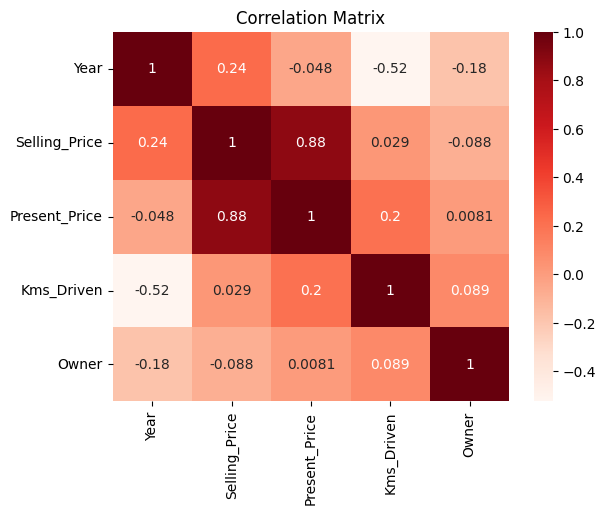

In [16]:
sns.heatmap(data.corr(numeric_only=True),cmap='Reds',annot=True)
plt.title('Correlation Matrix')

## Linear regression using single variable (Manual Calculation)

In [17]:
def estimate_selling_price(present_price,w,b):
    return w * present_price + b

In [18]:
w = 4
b = 50 
estimate_selling_price(12.5,w,b)

100.0

In [19]:
present_prices = data.Present_Price

In [20]:
estimate_selling_prices = estimate_selling_price(present_prices,w,b)
estimate_selling_prices

0       72.36
1       88.16
2       89.40
3       66.60
4       77.48
        ...  
296     96.40
297     73.60
298     94.00
299    100.00
300     73.60
Name: Present_Price, Length: 301, dtype: float64

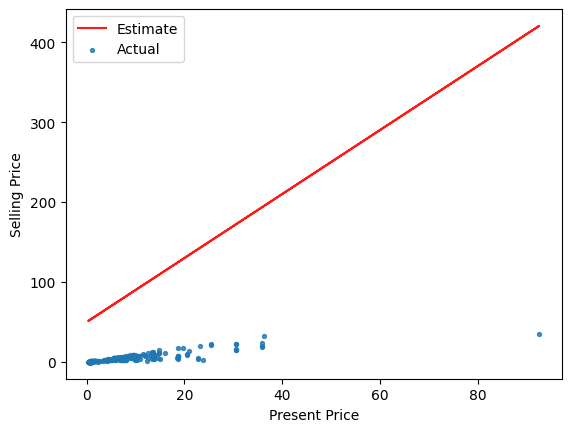

In [21]:
plt.plot(present_prices,estimate_selling_prices,'r',alpha=0.9)

target = data.Selling_Price
plt.scatter(present_prices,target,s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.legend(['Estimate','Actual'])

### MSE and RMSE

In [22]:
from sklearn.metrics import mean_squared_error
import numpy
mse = mean_squared_error(estimate_selling_prices,target)
rmse = numpy.sqrt(mse)
print('MSE: ',mse)
print('RMSE: ',rmse)

MSE:  6662.996320491694
RMSE:  81.62717881007339


## Linear regression using single variable (scikit-learn Library)

In [23]:
model = LinearRegression()
inputs = data[['Present_Price']]
target = data.Selling_Price
model.fit(X=inputs,y=target)

# prediction
estimate_selling_prices = model.predict(inputs)

In [24]:
model.predict(numpy.array([[10.8],[12.5],[6.9]]))

C:\Users\Prajeesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([6.30049697, 7.17914031, 4.28478576])

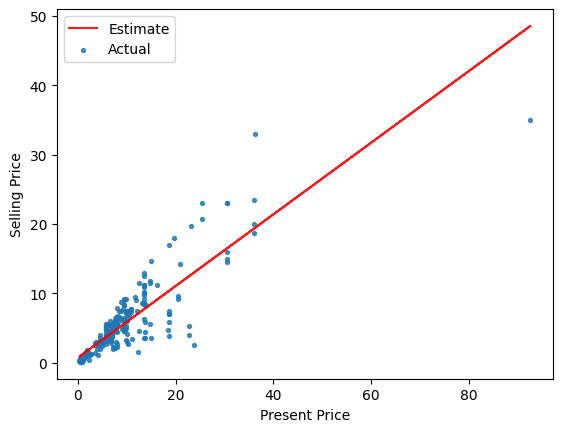

In [25]:
plt.plot(present_prices,estimate_selling_prices,'r',alpha=0.9)

target = data.Selling_Price
plt.scatter(present_prices,target,s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.legend(['Estimate','Actual'])

In [26]:
mse = mean_squared_error(estimate_selling_prices,target)
rmse = numpy.sqrt(mse)
print('MSE: ',mse)
print('RMSE: ',rmse)
print("w: ",model.coef_) # Weight --> w (slope)
print("b: ",model.intercept_) # Bias --> b (intercept)

MSE:  5.855089487051356
RMSE:  2.4197292177124603
w:  [0.51684903]
b:  0.7185274709817686


## Linear regression using Multiple variable (Manual Calculation)

In [27]:
w1 = 0.3
w2 = 0.5
w3 = 0.6
b = 50

input_1 = data.Present_Price
input_2 = data.Year
input_3 = data.Kms_Driven

In [28]:
def estimate_selling_price(input_1,input_2,input_3,w1,w2,w3,b):
    return (w1 * input_1) + (w2 *input_2) + (w3 * input_3) + b

In [29]:
estimate_selling_prices = estimate_selling_price(input_1,input_2,input_3,w1,w2,w3,b)

In [30]:
estimate_selling_prices

0      17258.677
1      26859.362
2       5201.455
3       4176.745
4      26529.061
         ...    
296    21454.280
297    37059.270
298    53818.200
299     6462.250
300     4338.170
Length: 301, dtype: float64

In [31]:
mse = mean_squared_error(estimate_selling_prices,target)
rmse = numpy.sqrt(mse)
print('MSE: ',mse)
print('RMSE: ',rmse)

MSE:  1081858922.8536966
RMSE:  32891.62390113472


## Linear regression using Multiple variable (Scikit-learn Library)

In [32]:
inputs = data[['Present_Price','Year','Kms_Driven']]
target = data.Selling_Price

model = LinearRegression()
model.fit(X=inputs,y=target)


LinearRegression()

In [33]:
estimate_selling_prices = model.predict(inputs)

In [34]:
mse = mean_squared_error(estimate_selling_prices,target)
rmse = numpy.sqrt(mse)
print('MSE: ',mse)
print('RMSE: ',rmse)

MSE:  3.8595166657593
RMSE:  1.9645652612624758


#### Categorical Features

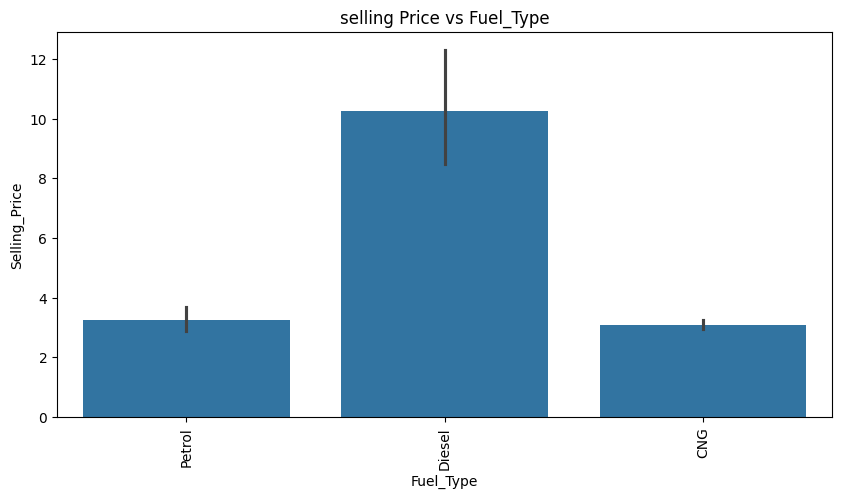

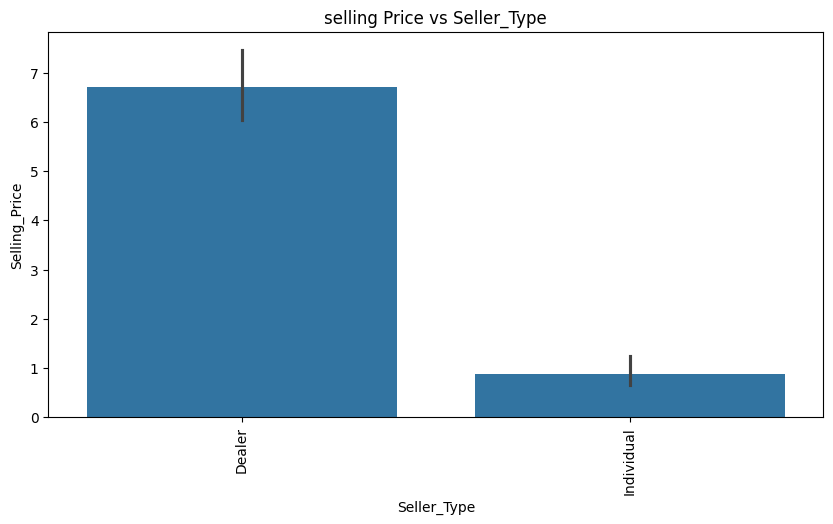

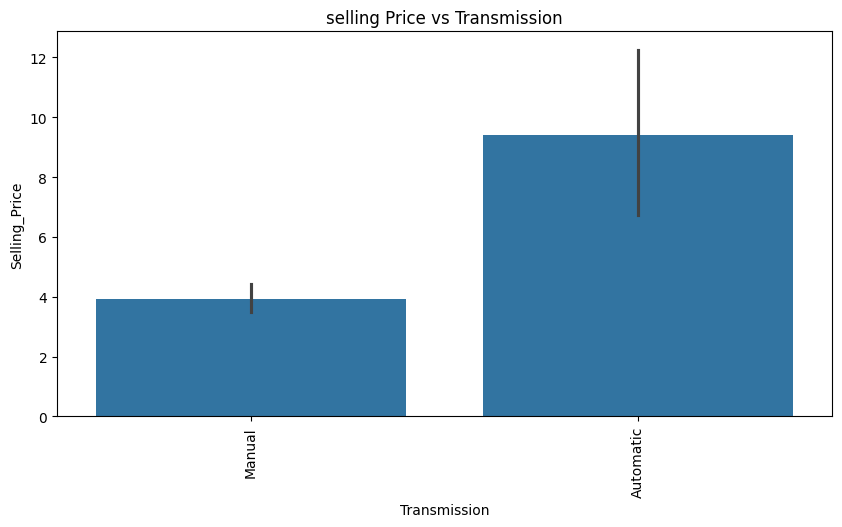

In [35]:
categorical_columns = ['Fuel_Type','Seller_Type','Transmission']

for columns in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.barplot(data=data, x = columns, y = "Selling_Price")
    plt.xticks(rotation = 90)
    plt.title(f'selling Price vs {columns}')
    plt.show()


In [36]:

data = pd.get_dummies(data, columns=['Fuel_Type','Seller_Type','Transmission'], drop_first=True,dtype=int)

In [38]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


In [39]:
X = data.drop(['Car_Name','Selling_Price'],axis=1)
y = data.Selling_Price

In [40]:
X

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0,1
297,2015,5.90,60000,0,0,1,0,1
298,2009,11.00,87934,0,0,1,0,1
299,2017,12.50,9000,0,1,0,0,1


In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=7)


In [46]:
xtrain

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
40,2016,7.870,24524,0,0,1,0,0
237,2015,13.600,68000,0,1,0,0,1
11,2015,10.380,51000,0,1,0,0,1
230,2013,9.400,45000,0,1,0,0,1
236,2016,4.430,11849,0,0,1,0,1
...,...,...,...,...,...,...,...,...
211,2015,14.790,43535,0,1,0,0,1
67,2010,20.450,59000,0,1,0,0,1
25,2011,4.990,20000,0,0,1,0,1
196,2008,0.520,500000,0,0,1,1,0


In [47]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [49]:
xtrain[1]

array([ 0.47506907,  0.90187073,  0.81210296, -0.18730358,  1.91485422,
       -1.88817833, -0.74535599,  0.40824829])

In [52]:
model = LinearRegression()
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
pred_train = model.predict(xtrain)

print("MAE: ",mean_absolute_error(pred,ytest))
print("MSE: ",mean_squared_error(pred,ytest))
print('MSE on training data: ', mean_squared_error(pred_train,ytrain))
print("R2 value: ",r2_score(pred,ytest))


MAE:  1.431518900447002
MSE:  3.796096353197518
MSE on training data:  2.312821677731693
R2 value:  0.8045527246994767


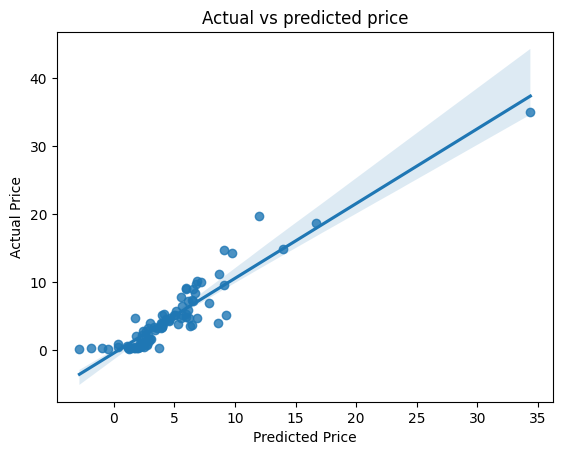

In [53]:
sns.regplot(x=pred,y=ytest)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("Actual vs predicted price")
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()

# Define the parameters you want to tune
parameters = {
    'fit_intercept': [True, False],
}

# Perform Grid Search Cross Validation
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(xtrain, ytrain)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'fit_intercept': True}
Best Score: 0.6840486825256574
